# Tema2

In [713]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [714]:
D_train = pd.read_csv('credit_risk_train.csv')
D_test = pd.read_csv('credit_risk_test.csv')
D_full = pd.read_csv('credit_risk_full.csv')

# EDA

* Numerical Attributes

In [715]:
columns_numeric = ['applicant_age', 'applicant_income', 'job_tenure_years', 'loan_amount', 'loan_rate','loan_income_ratio', 'credit_history_length_years', 'credit_history_length_months']
numeric_attributes = D_full[columns_numeric]
tabel = numeric_attributes.describe()
tabel

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
count,10000.000000,1.000000e+04,9736.000000,10000.000000,9060.000000,10000.000000,10000.000000,10000.000000
mean,27.745100,6.573421e+04,4.785744,9568.037500,11.007179,0.170130,5.811100,75.760700
std,6.360155,5.694439e+04,4.353122,6350.431581,3.266393,0.106814,4.050217,48.677362
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,25.000000
25%,23.000000,3.859500e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,41.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,57.000000
75%,30.000000,7.899700e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,102.000000
max,123.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.760000,30.000000,369.000000


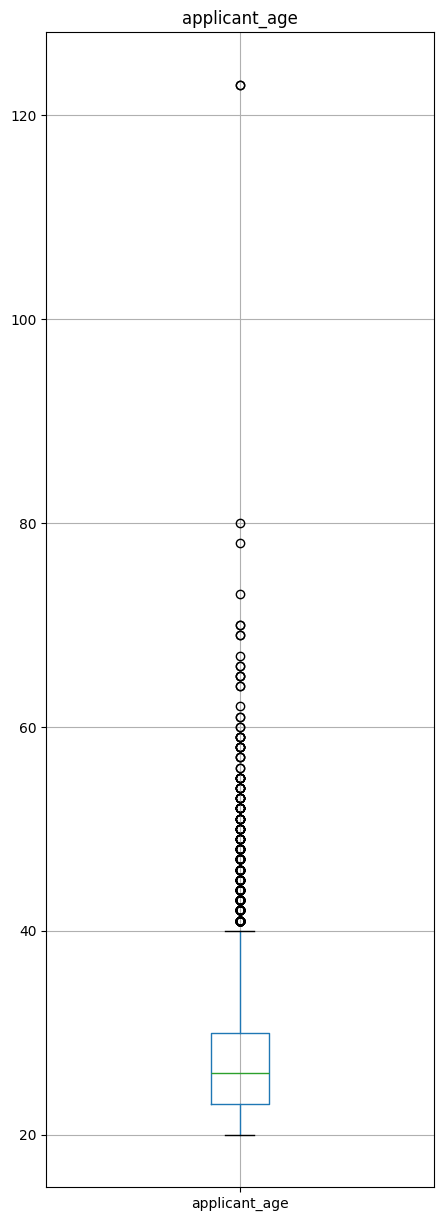

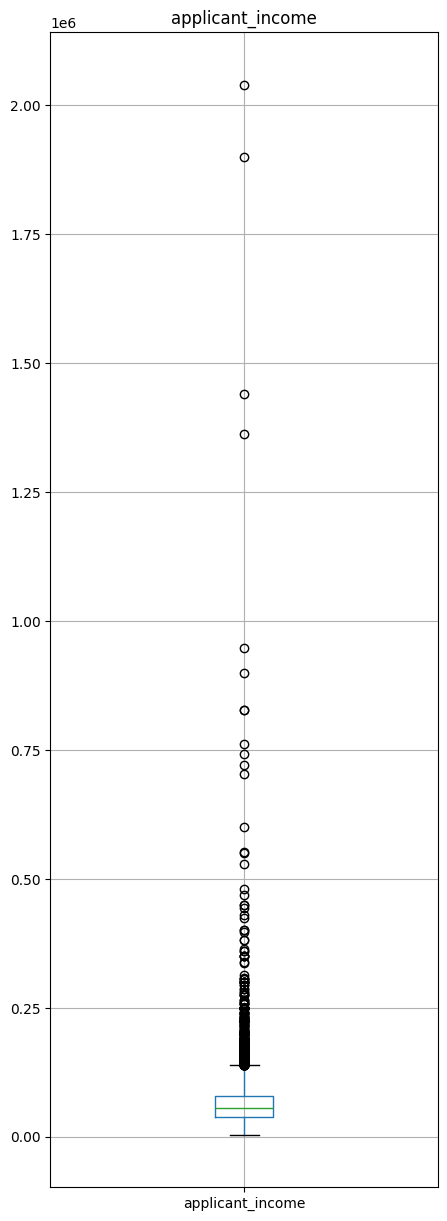

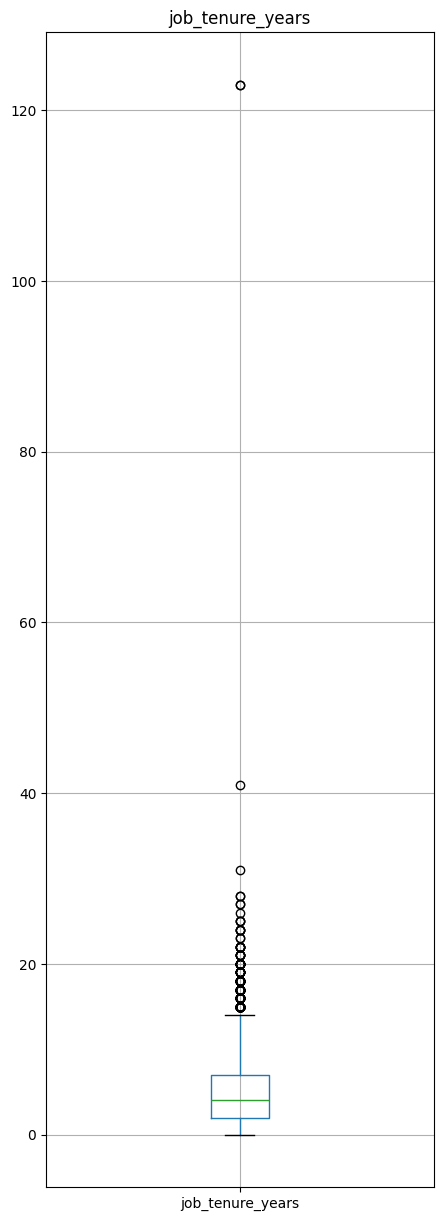

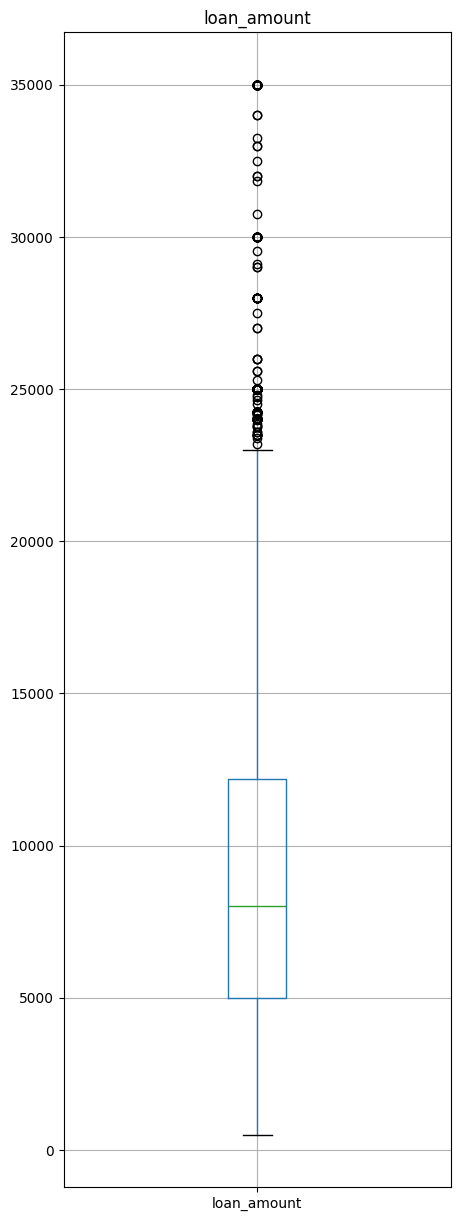

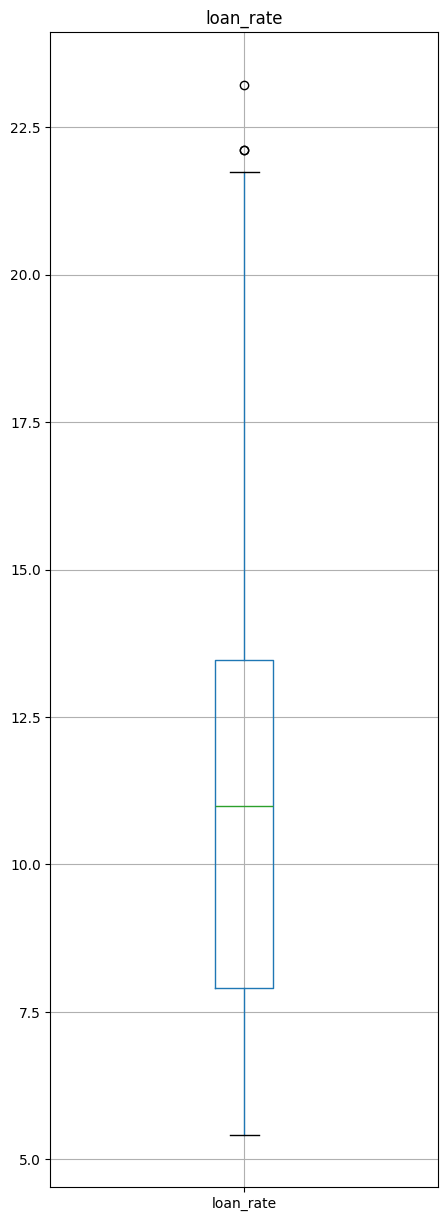

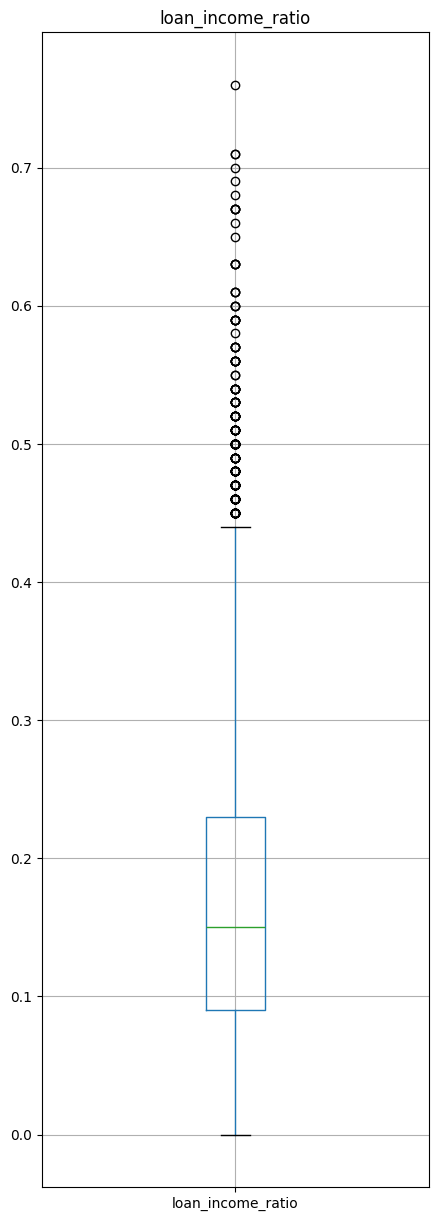

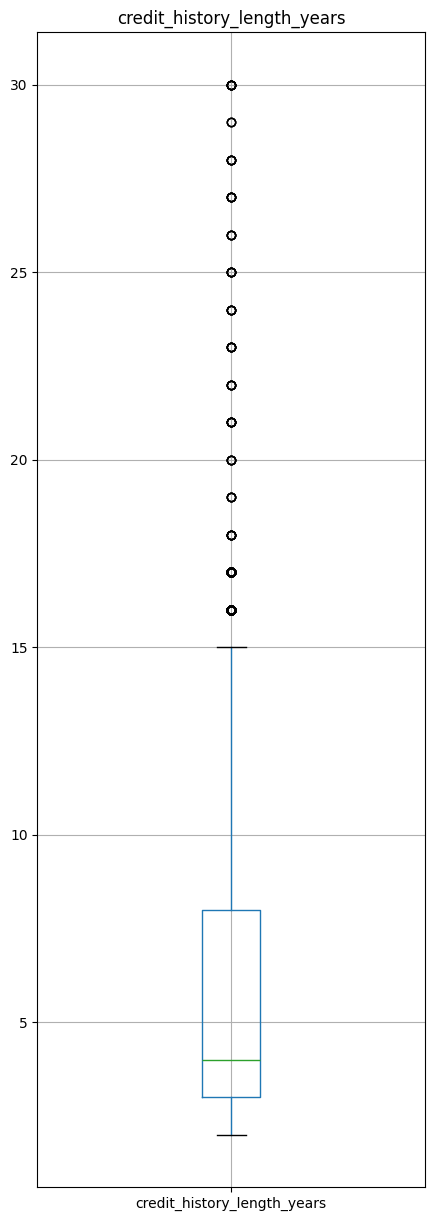

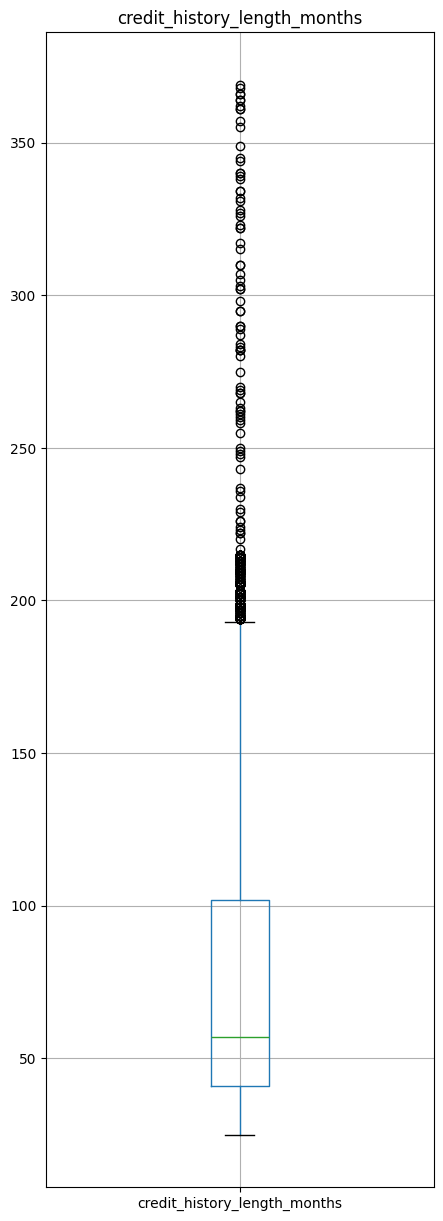

In [716]:
for column in numeric_attributes.columns:
    plt.figure(figsize=(5, 15))
    boxplot = numeric_attributes.boxplot(column=column)
    plt.title(column)
    plt.show()

* Discret Attributes

In [717]:
columns_to_drop = ['loan_approval_status','applicant_age', 'applicant_income', 'job_tenure_years', 'loan_amount', 'loan_rate','loan_income_ratio', 'credit_history_length_years', 'credit_history_length_months']
columns_discret = D_full.drop(columns=columns_to_drop)
discret_attributes = columns_discret
tabel_full =discret_attributes.describe()

summary_table = pd.DataFrame({
    'Attribute': discret_attributes.columns,
    'Non-missing Count': discret_attributes.count().values,
    'Unique Values Count': discret_attributes.nunique().values
})
summary_table


,Attribute,Non-missing Count,Unique Values Count
0,residential_status,10000,4
1,loan_purpose,10000,6
2,loan_rating,10000,7
3,credit_history_default_status,10000,2
4,stability_rating,10000,4


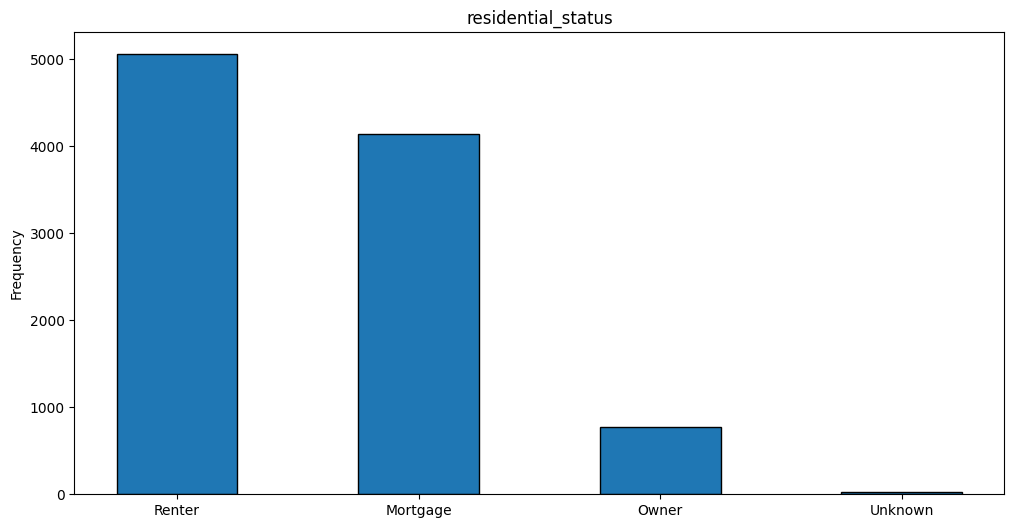

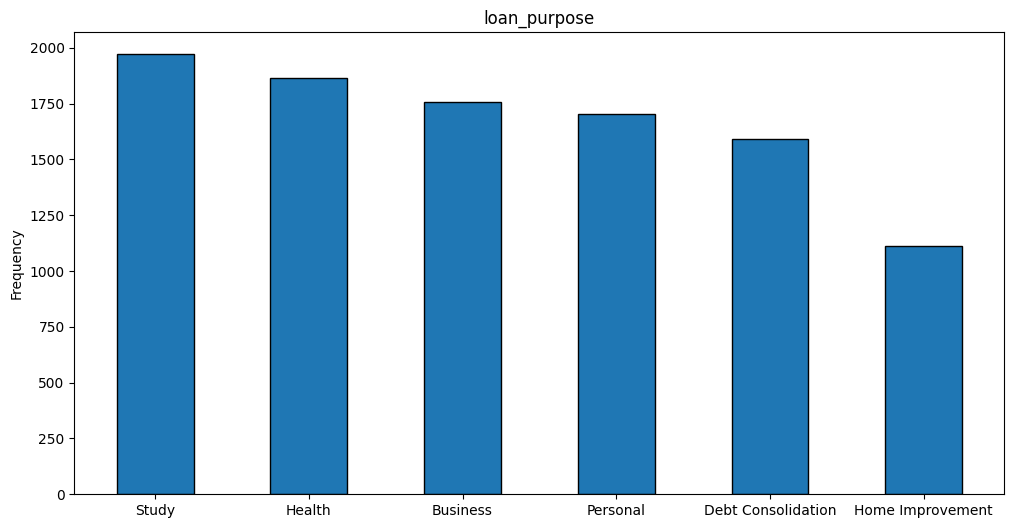

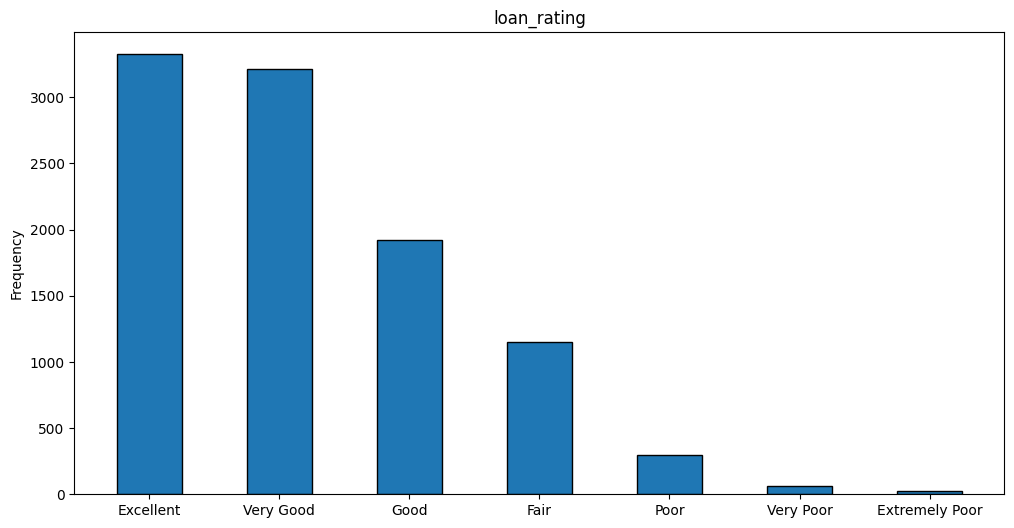

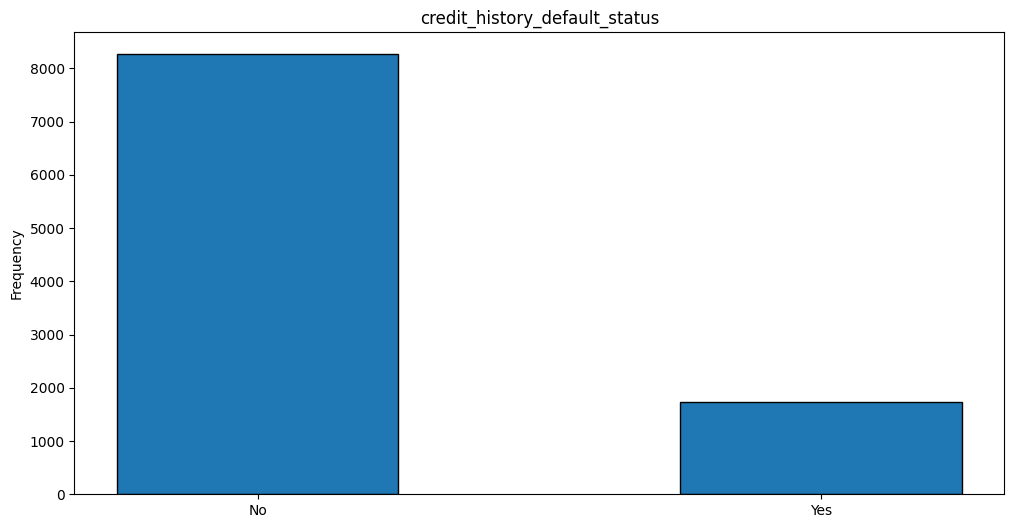

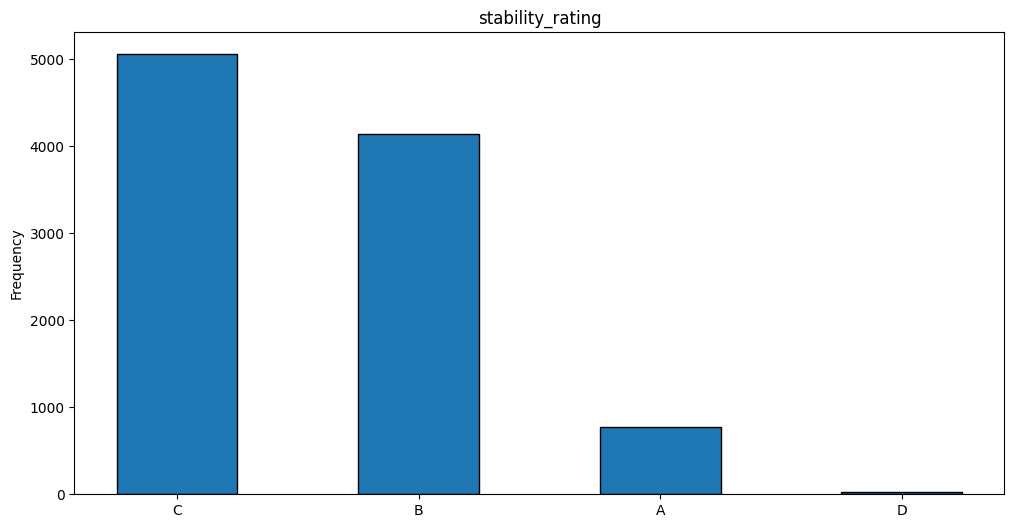

In [718]:
for column in discret_attributes.columns:
    freq = discret_attributes[column].value_counts()
    valori = freq.index.tolist()
    frecventa_valori = freq.tolist() 
    plt.figure(figsize=(12,6))
    plt.bar(valori, frecventa_valori, width=0.5, align='center', edgecolor='black')
    plt.xticks(valori)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.show()

# Class balance analysis

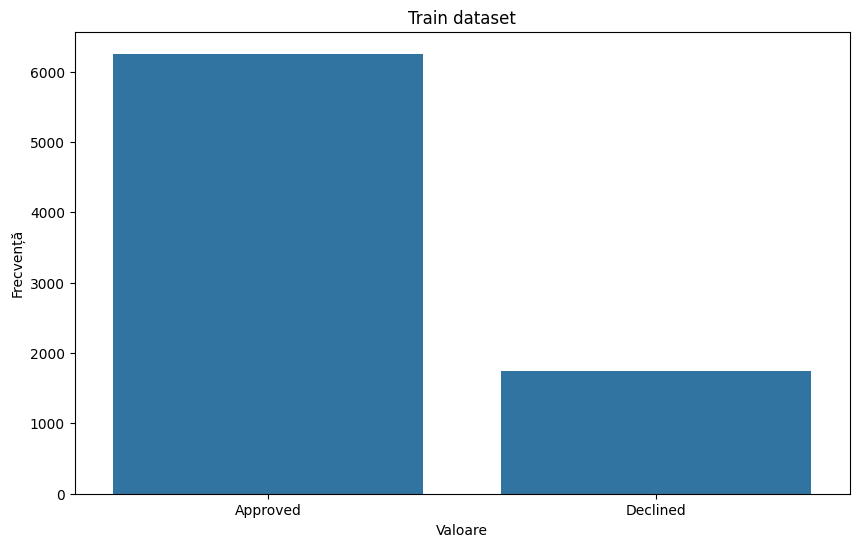

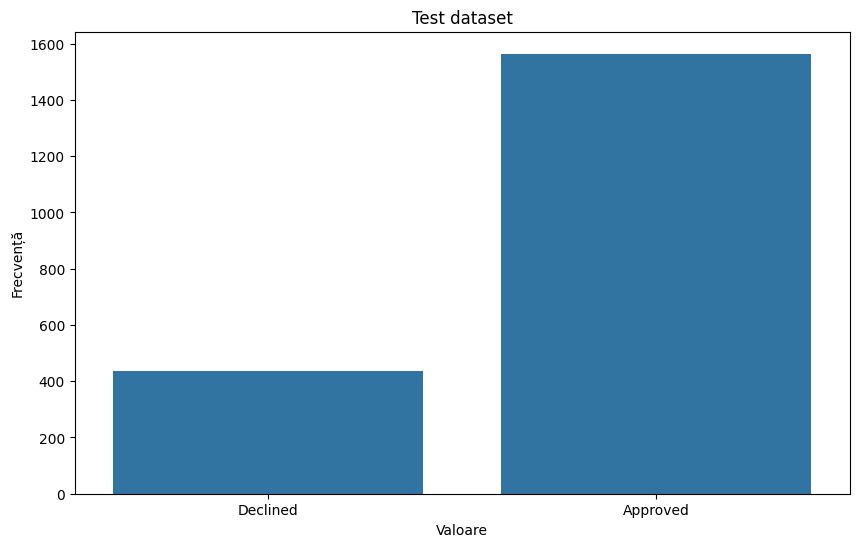

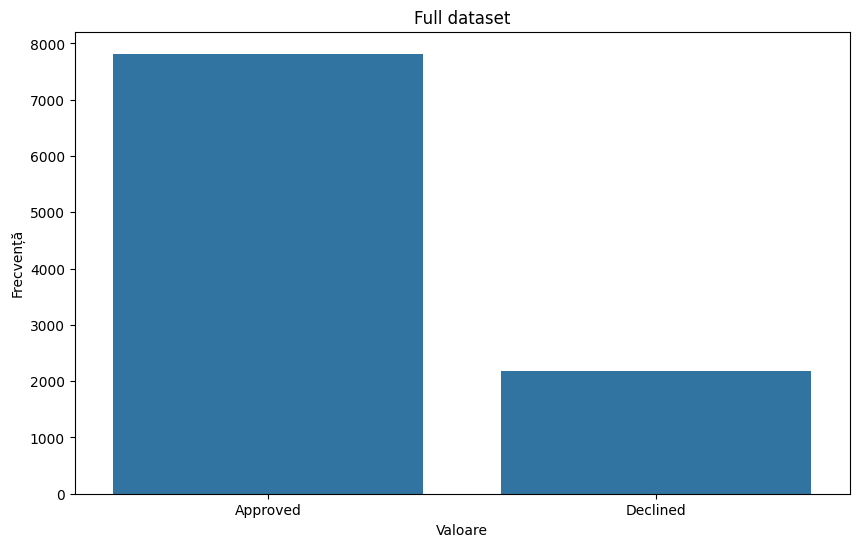

In [719]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_approval_status', data=D_train)
plt.title('Train dataset')
plt.xlabel('Valoare')
plt.ylabel('Frecvență')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_approval_status', data=D_test)
plt.title('Test dataset')
plt.xlabel('Valoare')
plt.ylabel('Frecvență')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_approval_status', data=D_full)
plt.title('Full dataset')
plt.xlabel('Valoare')
plt.ylabel('Frecvență')
plt.show()

#toate 3

# Correlation analysis between attributes

* Numerical

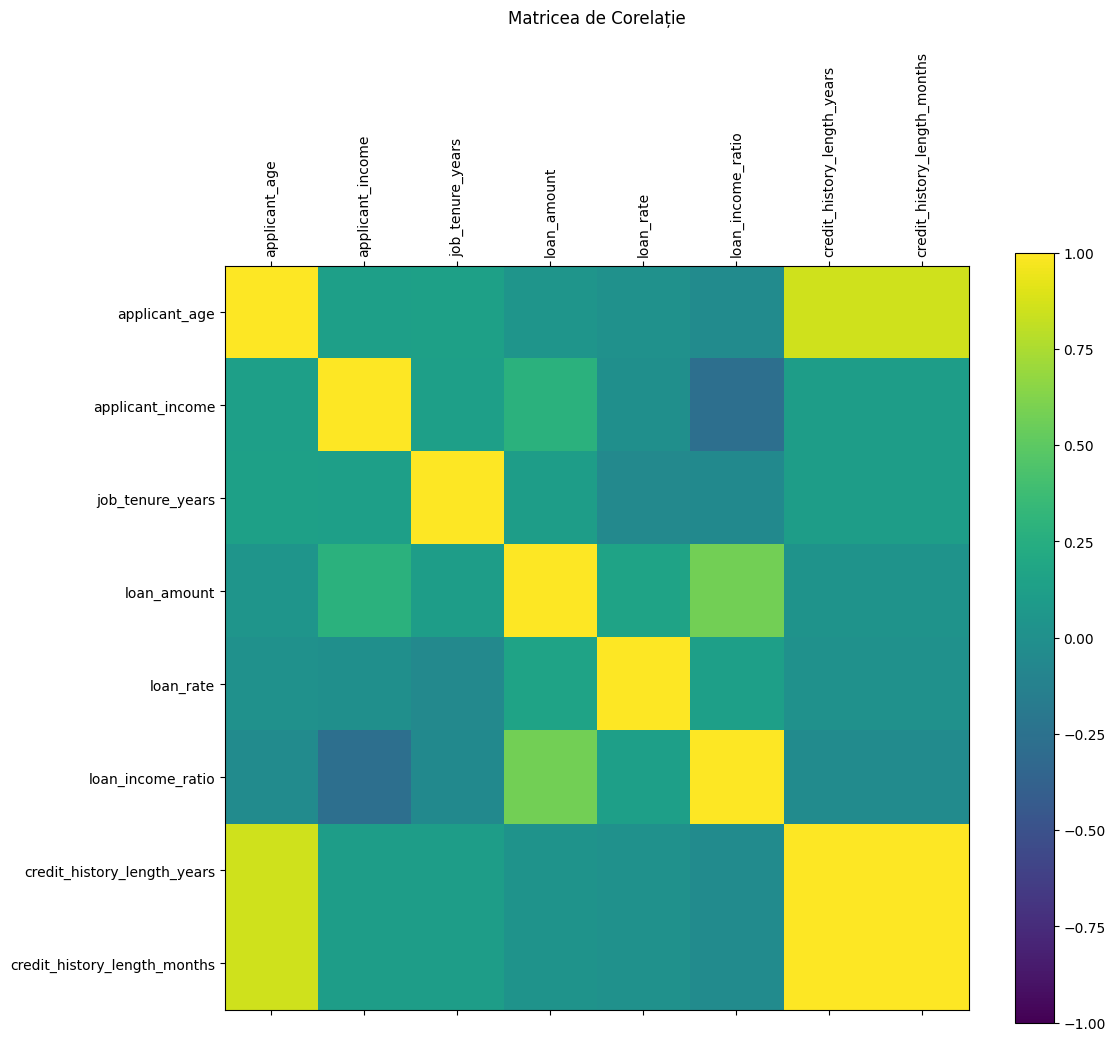

In [720]:
correlation_matrix = numeric_attributes.corr(method='pearson')

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)


plt.title('Matricea de Corelație', pad=20)
plt.show()

* Discret

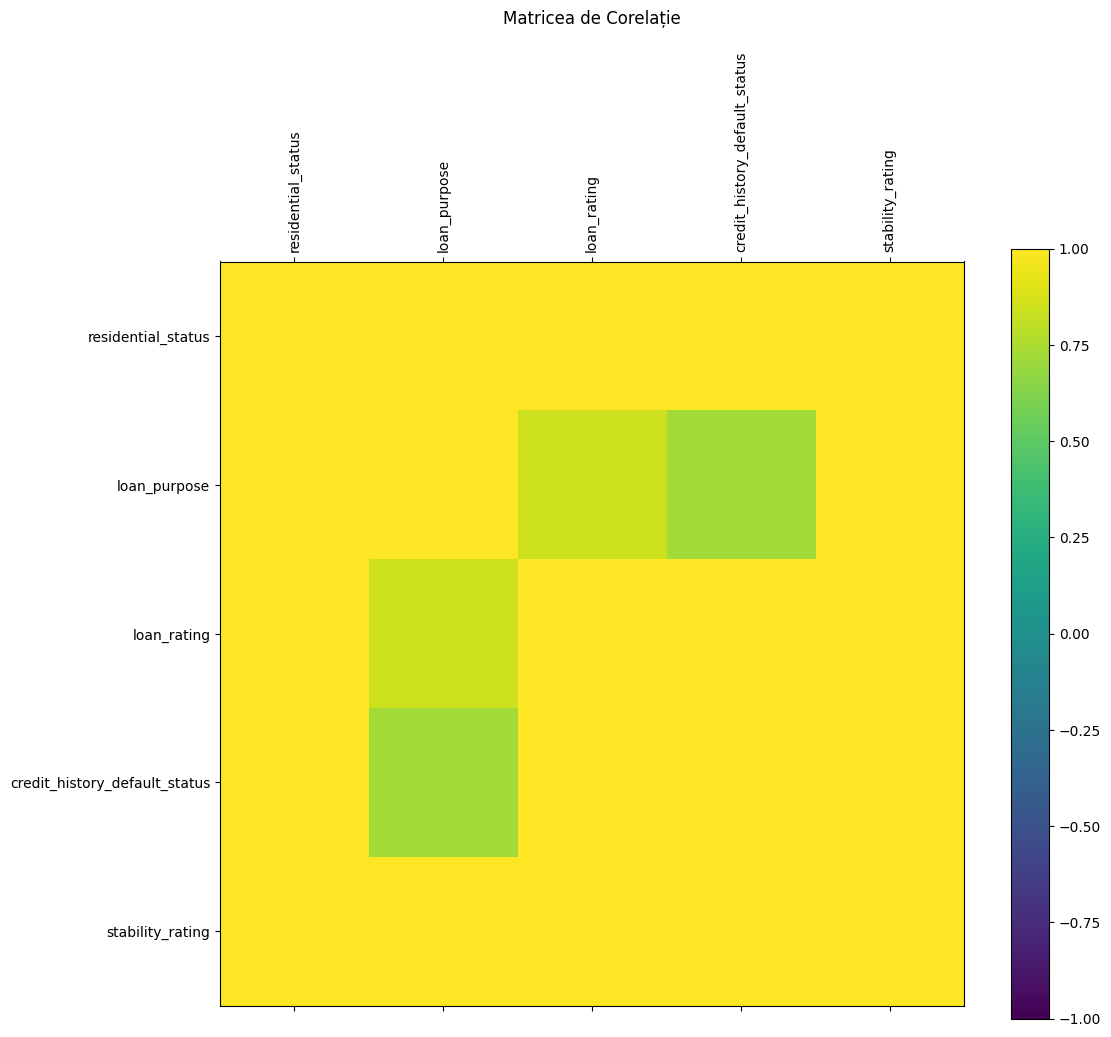

In [721]:
correlation_matrix = np.zeros((len(discret_attributes.columns), len(discret_attributes.columns)))
correlation_matrix = pd.DataFrame(correlation_matrix,index=discret_attributes.columns, columns=discret_attributes.columns)
pairs = combinations(discret_attributes.columns, 2)
for col1, col2 in pairs:
    CrosstabResult=pd.crosstab(index=D_full[col1],columns=D_full[col2])
    ChiSqResult = chi2_contingency(CrosstabResult)
    correlation_matrix.loc[col1, col2] = 1 - ChiSqResult[1]
    correlation_matrix.loc[col2, col1] = 1 - ChiSqResult[1]
    correlation_matrix.loc[col1, col1] = 1
    correlation_matrix.loc[col2, col2] = 1



fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Matricea de Corelație', pad=20)
plt.show()


# Data Preprocessing

* Missing data for an attribute in a sample

In [722]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_train[columns_numeric])
imputer.fit(D_test[columns_numeric])
D_train[columns_numeric] = imputer.transform(D_train[columns_numeric])
D_test[columns_numeric] = imputer.transform(D_test[columns_numeric])
D_full[columns_numeric] = imputer.transform(D_full[columns_numeric])

imp = SimpleImputer(strategy="most_frequent")
D_train[discret_attributes.columns] = imp.fit_transform(D_train[discret_attributes.columns])
D_test[discret_attributes.columns] = imp.fit_transform(D_test[discret_attributes.columns])
D_full[discret_attributes.columns] = imp.fit_transform(D_full[discret_attributes.columns])


In [723]:
D_test

,residential_status,loan_rate,loan_amount,loan_purpose,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating,credit_history_length_months,loan_approval_status
0,Mortgage,12.090000,12000.0,Business,1.0,2.0,26.0,25000.0,Good,No,0.48,B,30.0,Declined
1,Renter,10.991481,6000.0,Debt Consolidation,1.0,2.0,25.0,42000.0,Very Good,No,0.14,C,35.0,Approved
2,Mortgage,10.991481,13200.0,Home Improvement,2.0,5.0,30.0,58000.0,Excellent,No,0.23,B,63.0,Approved
3,Mortgage,9.630000,12000.0,Personal,1.0,4.0,25.0,160000.0,Very Good,No,0.07,B,57.0,Approved
4,Renter,7.900000,24000.0,Business,0.0,2.0,26.0,60000.0,Excellent,No,0.40,C,32.0,Declined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Renter,10.991481,6000.0,Personal,4.0,3.0,26.0,50000.0,Very Good,No,0.12,C,37.0,Approved
1996,Mortgage,15.650000,10000.0,Personal,4.0,3.0,24.0,61000.0,Fair,No,0.16,B,42.0,Approved
1997,Renter,8.940000,7000.0,Study,3.0,4.0,25.0,67000.0,Excellent,No,0.10,C,51.0,Approved
1998,Renter,10.991481,9500.0,Health,1.0,3.0,25.0,46000.0,Very Good,No,0.21,C,42.0,Approved


In [724]:
D_train

,residential_status,loan_rate,loan_amount,loan_purpose,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating,credit_history_length_months,loan_approval_status
0,Mortgage,13.430000,10000.0,Business,10.0,2.0,26.0,62000.0,Good,Yes,0.16,B,35.000,Approved
1,Mortgage,16.770000,6000.0,Personal,0.0,3.0,23.0,42000.0,Fair,No,0.14,B,73.562,Approved
2,Renter,8.590000,3250.0,Home Improvement,0.0,9.0,29.0,6000.0,Excellent,No,0.54,C,119.000,Declined
3,Mortgage,6.030000,5000.0,Personal,8.0,4.0,24.0,72000.0,Excellent,No,0.07,B,53.000,Approved
4,Renter,12.420000,10000.0,Business,2.0,7.0,34.0,26000.0,Very Good,No,0.38,C,88.000,Declined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Renter,10.991481,5000.0,Health,7.0,10.0,35.0,200000.0,Very Good,No,0.03,C,127.000,Approved
7996,Renter,12.530000,10400.0,Personal,2.0,4.0,23.0,41004.0,Very Good,No,0.25,C,57.000,Approved
7997,Renter,14.590000,8000.0,Debt Consolidation,5.0,8.0,30.0,32918.0,Fair,Yes,0.24,C,107.000,Declined
7998,Renter,10.650000,6800.0,Study,3.0,4.0,23.0,46852.0,Very Good,No,0.15,C,51.000,Declined



* Extreme values for an attribute in a sample

In [725]:
threshold = 1.5

for column in numeric_attributes.columns:
    Q1 = D_train[column].quantile(0.25)
    Q3 = D_train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = D_train[(D_train[column] < (Q1 - threshold * IQR)) | (D_train[column] > (Q3 + threshold * IQR))]
    D_train[column] = D_train[column].drop(outliers.index)

D_train = D_train.reset_index(drop=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_train[columns_numeric])
D_train[columns_numeric] = imputer.transform(D_train[columns_numeric])

for column in numeric_attributes.columns:
    Q1 = D_test[column].quantile(0.25)
    Q3 = D_test[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = D_test[(D_test[column] < (Q1 - threshold * IQR)) | (D_test[column] > (Q3 + threshold * IQR))]
    D_test[column] = D_test[column].drop(outliers.index)

D_test = D_test.reset_index(drop=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_test[columns_numeric])
D_test[columns_numeric] = imputer.transform(D_test[columns_numeric])

for column in numeric_attributes.columns:
    Q1 = D_full[column].quantile(0.25)
    Q3 = D_full[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = D_full[(D_full[column] < (Q1 - threshold * IQR)) | (D_full[column] > (Q3 + threshold * IQR))]
    D_full[column] = D_full[column].drop(outliers.index)

D_full = D_full.reset_index(drop=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_full[columns_numeric])
D_full[columns_numeric] = imputer.transform(D_full[columns_numeric])

In [726]:
D_train

,residential_status,loan_rate,loan_amount,loan_purpose,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating,credit_history_length_months,loan_approval_status
0,Mortgage,13.430000,10000.0,Business,10.0,2.0,26.0,62000.000000,Good,Yes,0.160000,B,35.000,Approved
1,Mortgage,16.770000,6000.0,Personal,0.0,3.0,23.0,42000.000000,Fair,No,0.140000,B,73.562,Approved
2,Renter,8.590000,3250.0,Home Improvement,0.0,9.0,29.0,6000.000000,Excellent,No,0.163849,C,119.000,Declined
3,Mortgage,6.030000,5000.0,Personal,8.0,4.0,24.0,72000.000000,Excellent,No,0.070000,B,53.000,Approved
4,Renter,12.420000,10000.0,Business,2.0,7.0,34.0,26000.000000,Very Good,No,0.380000,C,88.000,Declined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Renter,10.991481,5000.0,Health,7.0,10.0,35.0,58060.639002,Very Good,No,0.030000,C,127.000,Approved
7996,Renter,12.530000,10400.0,Personal,2.0,4.0,23.0,41004.000000,Very Good,No,0.250000,C,57.000,Approved
7997,Renter,14.590000,8000.0,Debt Consolidation,5.0,8.0,30.0,32918.000000,Fair,Yes,0.240000,C,107.000,Declined
7998,Renter,10.650000,6800.0,Study,3.0,4.0,23.0,46852.000000,Very Good,No,0.150000,C,51.000,Declined


In [727]:
D_test

,residential_status,loan_rate,loan_amount,loan_purpose,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating,credit_history_length_months,loan_approval_status
0,Mortgage,12.090000,12000.0,Business,1.0,2.0,26.0,25000.000000,Good,No,0.161228,B,30.0,Declined
1,Renter,10.991481,6000.0,Debt Consolidation,1.0,2.0,25.0,42000.000000,Very Good,No,0.140000,C,35.0,Approved
2,Mortgage,10.991481,13200.0,Home Improvement,2.0,5.0,30.0,58000.000000,Excellent,No,0.230000,B,63.0,Approved
3,Mortgage,9.630000,12000.0,Personal,1.0,4.0,25.0,59119.448222,Very Good,No,0.070000,B,57.0,Approved
4,Renter,7.900000,24000.0,Business,0.0,2.0,26.0,60000.000000,Excellent,No,0.400000,C,32.0,Declined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Renter,10.991481,6000.0,Personal,4.0,3.0,26.0,50000.000000,Very Good,No,0.120000,C,37.0,Approved
1996,Mortgage,15.650000,10000.0,Personal,4.0,3.0,24.0,61000.000000,Fair,No,0.160000,B,42.0,Approved
1997,Renter,8.940000,7000.0,Study,3.0,4.0,25.0,67000.000000,Excellent,No,0.100000,C,51.0,Approved
1998,Renter,10.991481,9500.0,Health,1.0,3.0,25.0,46000.000000,Very Good,No,0.210000,C,42.0,Approved


* Redundant attributes

Prin analiza matricei de corelatie pentru atributele numerice se poate observa ca atat atributul credit_history_length_years cat si  atributul credit_history_length_months sunt puternic corelate cu atributul applcant_age. Astfel, se poate renunta la ambele.

Prin analiza matricei de corelatie pentru atributele discrete,desi p ul este foarte mic,aceasta spune doar ca atributele nu sunt independente. Datorita testerii in alogitmii de mai jos, am decis sa nu elimin nici un atribut discret

* Value ranges of different sizes for numeric attributes

In [728]:
scaler = preprocessing.StandardScaler().fit(D_train[numeric_attributes.columns])
D_train[numeric_attributes.columns] = scaler.transform(D_train[numeric_attributes.columns])

scaler = preprocessing.StandardScaler().fit(D_test[numeric_attributes.columns])
D_test[numeric_attributes.columns] = scaler.transform(D_test[numeric_attributes.columns])

scaler = preprocessing.StandardScaler().fit(D_full[numeric_attributes.columns])
D_full[numeric_attributes.columns] = scaler.transform(D_full[numeric_attributes.columns])

In [729]:
D_test[numeric_attributes.columns]

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
0,-0.164614,-1.274591,-1.058544,0.485709,0.363396,2.978017e-16,-1.022208,-1.033629
1,-0.392586,-0.639527,-1.058544,-0.570989,0.003531,-2.277604e-01,-1.022208,-0.899375
2,0.747276,-0.041819,-0.765765,0.697049,0.003531,7.378889e-01,-0.083317,-0.147554
3,-0.392586,0.000000,-1.058544,0.485709,-0.442477,-9.788210e-01,-0.396281,-0.308659
4,-0.164614,0.032895,-1.351323,2.599106,-1.009209,2.561893e+00,-1.022208,-0.979927
...,...,...,...,...,...,...,...,...
1995,-0.164614,-0.340673,-0.180206,-0.570989,0.003531,-4.423491e-01,-0.709245,-0.845674
1996,-0.620558,0.070251,-0.180206,0.133476,1.529619,-1.317169e-02,-0.709245,-0.711420
1997,-0.392586,0.294392,-0.472986,-0.394873,-0.668515,-6.569379e-01,-0.396281,-0.469763
1998,-0.392586,-0.490100,-1.058544,0.045418,0.003531,5.233001e-01,-0.709245,-0.711420


In [730]:
D_train[numeric_attributes.columns]

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
0,-0.183236,1.496156e-01,1.660697,0.118597,0.788009,-0.040426,-1.049997,-0.995161
1,-0.861397,-6.099777e-01,-1.312354,-0.575815,1.868278,-0.250474,-0.740099,0.109678
2,0.494925,-1.977246e+00,-1.312354,-1.053223,-0.777411,0.000000,1.119293,1.411521
3,-0.635344,5.294122e-01,1.066087,-0.749417,-1.605402,-0.985641,-0.430200,-0.479444
4,1.625194,-1.217652e+00,-0.717744,0.118597,0.461341,2.270101,0.499495,0.523341
...,...,...,...,...,...,...,...,...
7995,1.851247,-2.763384e-16,0.768782,-0.749417,-0.000691,-1.405737,1.429191,1.640728
7996,-0.861397,-6.478054e-01,-0.717744,0.188038,0.496918,0.904790,-0.430200,-0.364840
7997,0.720979,-9.549090e-01,0.174172,-0.228609,1.163192,0.799766,0.809394,1.067709
7998,-0.861397,-4.257003e-01,-0.420439,-0.436932,-0.111137,-0.145450,-0.430200,-0.536745


# Random Forest

* Scikit-Learn implementation

In [945]:
def plot_confusion_matrix(y_pred: pd.Series, y_true: pd.Series):
    confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    all_classes = np.unique(list(y_true) + list(y_pred))
    confusion_matrix = confusion_matrix.reindex(index=all_classes, columns=all_classes, fill_value=0)
    print(confusion_matrix)
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

Accuracy 0.8195
              precision    recall  f1-score   support

    Approved       0.93      0.84      0.88      1564
    Declined       0.56      0.76      0.65       436

    accuracy                           0.82      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.85      0.82      0.83      2000

Predicted  Approved  Declined
Actual                       
Approved       1307       257
Declined        104       332


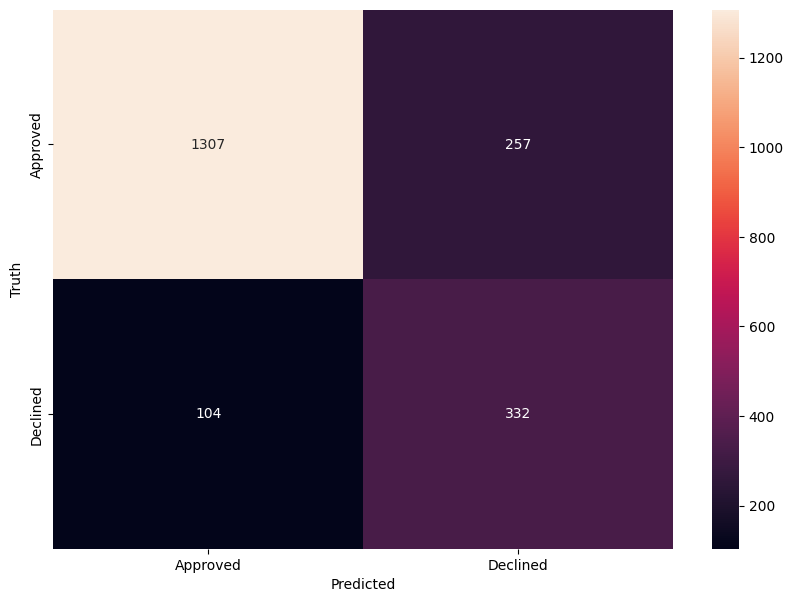

Train:
              precision    recall  f1-score   support

    Approved       0.84      0.94      0.89      5608
    Declined       0.80      0.59      0.68      2392

    accuracy                           0.83      8000
   macro avg       0.82      0.76      0.78      8000
weighted avg       0.83      0.83      0.82      8000

Predicted  Approved  Declined
Actual                       
Approved       5264       990
Declined        344      1402


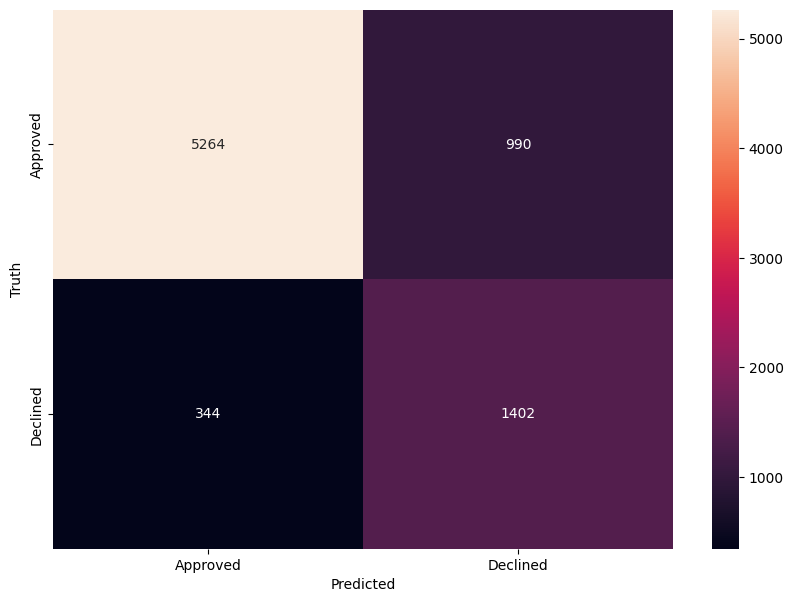

FULL
              precision    recall  f1-score   support

    Approved       0.84      0.94      0.89      7017
    Declined       0.79      0.58      0.67      2983

    accuracy                           0.83     10000
   macro avg       0.82      0.76      0.78     10000
weighted avg       0.83      0.83      0.82     10000

Predicted  Approved  Declined
Actual                       
Approved       6565      1253
Declined        452      1730


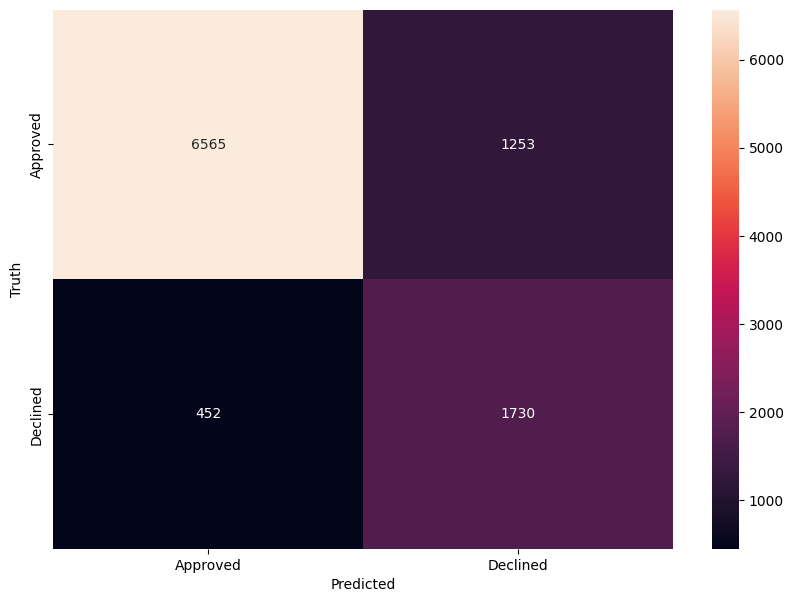

In [949]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV 

numeric_columns  = ['applicant_age', 'applicant_income', 'job_tenure_years', 'loan_amount', 'loan_rate','loan_income_ratio']
categorical_columns = discret_attributes.columns.tolist()
y_train = D_train['loan_approval_status']
x_train = D_train[numeric_columns + categorical_columns]
y_test = D_test['loan_approval_status']
x_test = D_test[numeric_columns + categorical_columns]
y_Full = D_full['loan_approval_status']
x_full = D_full[numeric_columns + categorical_columns]

X_train_encoded = pd.get_dummies(x_train,dtype='float64')
X_test_encoded = pd.get_dummies(x_test,dtype='float64')
x_full_encoded = pd.get_dummies(x_full,dtype='float64')

X_train_encoded = X_train_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_test_encoded.columns, fill_value=0)
X_full_encoded = x_full_encoded.reindex(columns=x_full_encoded.columns, fill_value=0)

param_grid = { 
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120, None],
    'max_leaf_nodes': [3, 6, 9, 12,15,18,21,25,30,40,50,60,70,80,90,100, None], 
    'criterion': ['gini', 'entropy','log_loss'],
    'class_weight': ['balanced', 'balanced_subsample'],
} 
# random_search = RandomizedSearchCV(RandomForestClassifier(), 
# param_grid, n_iter=10, cv=3,verbose=2, scoring='f1', n_jobs=-1, random_state=42) 
# random_search.fit(X_train_encoded, y_train) 
# print(random_search.best_estimator_) 

# sklearn_random_forest = random_search.best_estimator_
sklearn_random_forest = RandomForestClassifier(n_estimators=200, max_depth=110,min_samples_leaf = 10,max_leaf_nodes=9, criterion='gini', class_weight='balanced')
sklearn_random_forest.fit(X_train_encoded, y_train)
y_pred = sklearn_random_forest.predict(X_test_encoded)
print("Accuracy",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_pred, y_test)
print("Train:")
y_train_pred = sklearn_random_forest.predict(X_train_encoded)
print(classification_report(y_train_pred, y_train))
plot_confusion_matrix(y_train_pred, y_train)
print("FULL")
y_full_pred = sklearn_random_forest.predict(X_full_encoded)
print(classification_report(y_full_pred, y_Full))
plot_confusion_matrix(y_full_pred, y_Full)



* Random Forest Implementation

In [733]:
from typing import Optional
from typing import Dict

class DecisionTreeNode:
    def __init__(self, 
                 feature: Optional[str] = None, 
                 children: Optional[Dict[str, 'DecisionTreeNode']] = None, 
                 label: Optional[str] = None):
        self.split_feature = feature
        self.children = children if (children is not None and feature is not None) else {}
        self.label = label
        self.depth = 1
        self.score = 0
        self.num_samples = 0

In [734]:
import math
from copy import deepcopy
from typing import Callable
class DecisionTree:
    def __init__(self,
                 class_weight: str = 'balanced',
                 max_depth: int = np.inf,
                 min_samples_per_node: int = 1):
        self._root: DecisionTreeNode | None = None 
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        self.__class_weight:str = class_weight


    @staticmethod
    def most_frequent_class(y: pd.Series) -> str:
        most_frequent = y.mode()[0]
        return most_frequent


    @staticmethod
    def compute_entropy(y: pd.Series) -> float:
        entropy = 0
        class_counts = y.value_counts()
        total_samples = len(y)

        for count in class_counts:
            probability = count / total_samples
            entropy -= probability * math.log2(probability)

        return entropy



    @staticmethod
    def information_gain(groups, y):
        initial_entropy = DecisionTree.compute_entropy(y)
        n_instances = float(sum(len(group) for group in groups))
        final_entropy = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            subset_y = [row[-1] for row in group]
            subset_entropy = DecisionTree.compute_entropy(subset_y)
            subset_weight = size / n_instances
            final_entropy += subset_weight * subset_entropy
        information_gain = initial_entropy - final_entropy
        return information_gain

    
    @staticmethod
    def gini_index(groups, y):
        n_instances = float(sum(len(group) for group in groups))
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            group_labels = y[group.index]
            class_counts = group_labels.value_counts(normalize=True)
            for index,p in class_counts.items():
                score += p * p 
            gini += (1.0 - score) * (size / n_instances)
        return gini


    
    
    @staticmethod
    def get_split(X: pd.DataFrame, y: pd.Series, attribute_list: list[str]):
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in attribute_list:
            attribute_values = X[index].values
            for value in np.unique(attribute_values):
                left_indices = np.where(attribute_values < value)[0]
                right_indices = np.where(attribute_values >= value)[0]
                left_group, right_group = X.iloc[left_indices], X.iloc[right_indices]
                groups = (left_group, right_group)
                gini = DecisionTree.gini_index(groups, y)

                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, value, gini, groups
        
        return b_index


    def _generate_tree(self,
                       parent_node: DecisionTreeNode | None,
                       X: pd.DataFrame,
                       y: pd.Series,
                       feature_list: list[str],
                       select_feature_func: Callable[[pd.DataFrame, pd.Series, list[str]], str]) -> DecisionTreeNode:
        feature_list = deepcopy(feature_list)
        node = DecisionTreeNode()
        node.depth = parent_node.depth + 1 if parent_node is not None else 0
        node.score = DecisionTree.compute_entropy(y)
        node.num_samples = len(y)
        node.label = DecisionTree.most_frequent_class(y)
        if (len(feature_list) == 0 or
            node.depth >= self._max_depth or
            node.num_samples < self._min_samples_per_node or
            y.nunique() == 1):
            return node
        split_feature =DecisionTree.get_split(X, y, feature_list)
        feature_list.remove(split_feature)
        node.split_feature = split_feature
        for value in X[split_feature].unique():
            subset_X = X[X[split_feature] == value]
            subset_y = y[X[split_feature] == value]
            subtree = self._generate_tree(node, subset_X, subset_y, feature_list, select_feature_func)
            node.children[value] = subtree
        return node

    def apply_class_weight(self, y):
            class_counts = np.bincount(y)
            n_samples = len(y)
            n_classes = len(class_counts)
            weights = n_samples / (n_classes * class_counts)
            return weights
    

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self._root = self._generate_tree(parent_node=None,
                                         X=X,
                                         y=y,
                                         feature_list=X.columns.tolist(),
                                        select_feature_func=DecisionTree.get_split)

    def _predict_once(self, x: pd.Series) -> str:
        node = self._root
        while node.split_feature is not None:
            if node.split_feature in x and x[node.split_feature] in node.children:
                node = node.children[x[node.split_feature]]
            else:
                break
        return node.label

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        return np.array([self._predict_once(x) for _, x in X.iterrows()])


In [735]:
from collections import Counter
class RandomForest:

    def __init__(self,
                 n_estimators: int = 100,
                 max_depth: int = 3,
                 min_samples_per_node: int = 1,
                 class_weight: str = 'balanced',
                 subset_size_ratio: float = 0.5,
                 subset_feature_ratio: float = 0.75):
        assert 0 < subset_size_ratio <= 1, "subset_size_ratio must be between 0 and 1"
        assert 0 < subset_feature_ratio <= 1, "subset_feature_ratio must be between 0 and 1"
        self._trees: list[DecisionTree] = []
        self._n_estimators: int = n_estimators
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        self._class_weight = class_weight
        self._subset_size_ratio: float = subset_size_ratio
        self._subset_feature_ratio: float = subset_feature_ratio

    def fit(self, X: pd.DataFrame, y: pd.Series):
        for _ in range(self._n_estimators):
            indices = np.random.choice(X.shape[0], size=int(self._subset_size_ratio * X.shape[0]), replace=False)
            X_subset = X.iloc[indices]
            y_subset = y.iloc[indices]
            features = np.random.choice(X.columns, size=int(self._subset_feature_ratio * X.shape[1]), replace=False)
            tree = DecisionTree(self._class_weight, self._max_depth, self._min_samples_per_node)
            tree.fit(X_subset[features], y_subset)
            self._trees.append(tree)

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        predictions = []
        for tree in self._trees:
            predictions.append(tree.predict(X))
        return np.array([Counter(pred).most_common(1)[0][0] for pred in np.array(predictions).T])

Accuracy: 0.81
              precision    recall  f1-score   support

    Approved       0.83      0.95      0.89      1564
    Declined       0.64      0.30      0.41       436

    accuracy                           0.81      2000
   macro avg       0.73      0.63      0.65      2000
weighted avg       0.79      0.81      0.78      2000

Predicted  Approved  Declined
Actual                       
Approved       1490        74
Declined        306       130


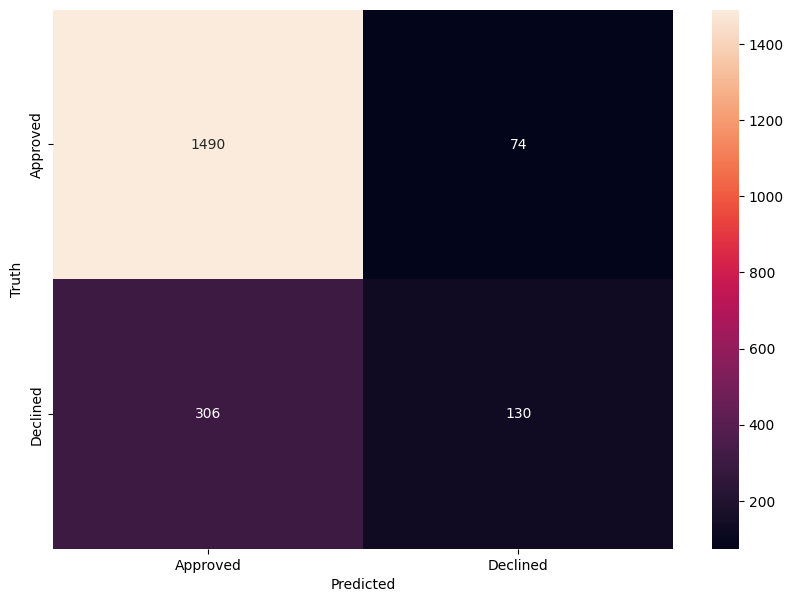

Train:
              precision    recall  f1-score   support

    Approved       0.97      0.91      0.94      6684
    Declined       0.66      0.87      0.75      1316

    accuracy                           0.91      8000
   macro avg       0.82      0.89      0.85      8000
weighted avg       0.92      0.91      0.91      8000

Predicted  Approved  Declined
Actual                       
Approved       6089       165
Declined        595      1151


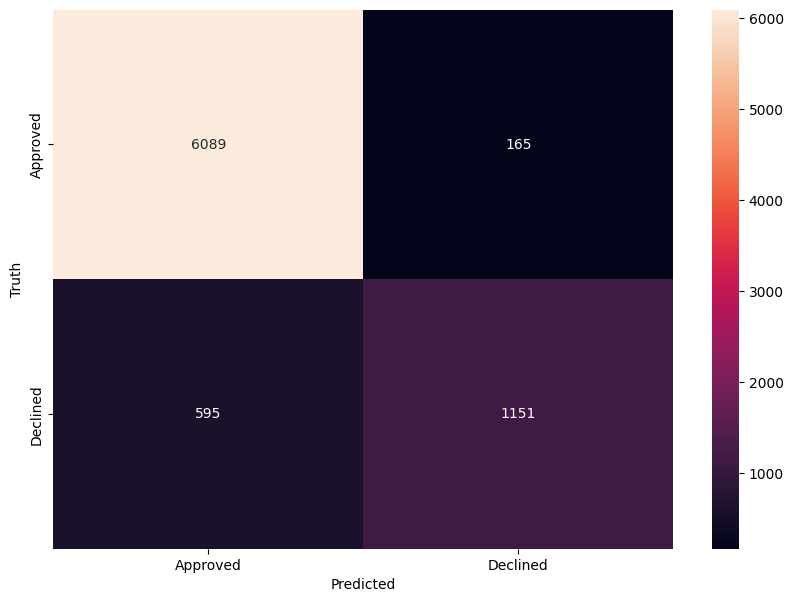

FULL
              precision    recall  f1-score   support

    Approved       0.95      0.83      0.89      8950
    Declined       0.31      0.64      0.42      1050

    accuracy                           0.81     10000
   macro avg       0.63      0.74      0.65     10000
weighted avg       0.88      0.81      0.84     10000

Predicted  Approved  Declined
Actual                       
Approved       7440       378
Declined       1510       672


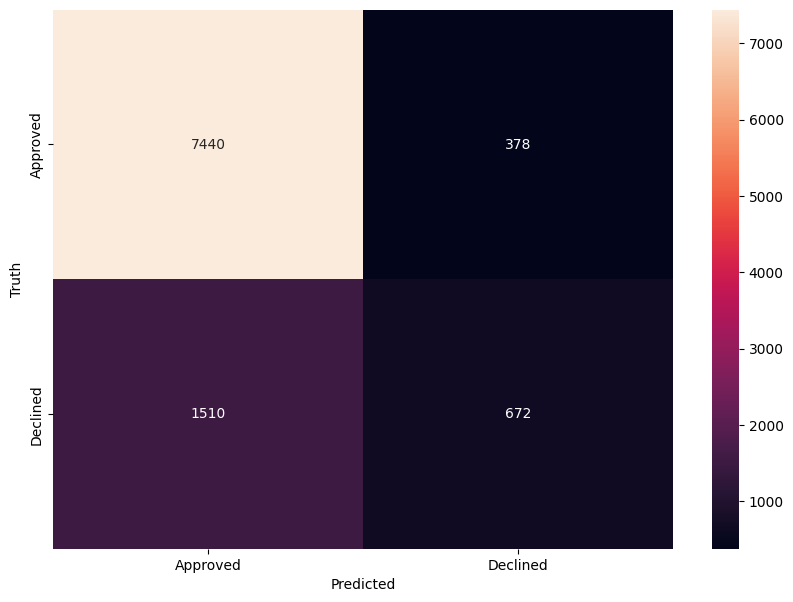

In [944]:
from imblearn.over_sampling import SMOTE

random_forest = RandomForest(n_estimators=10,
                             max_depth=5,
                             min_samples_per_node=31)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)
random_forest.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest.predict(X_test_encoded)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf,zero_division=1))
plot_confusion_matrix(y_pred_rf, y_test)
print("Train:")
y_train_pred_rf = random_forest.predict(X_train_encoded)
print(classification_report(y_train_pred_rf, y_train,zero_division=1))
plot_confusion_matrix(y_train_pred_rf, y_train)
print("FULL")
y_full_pred_rf = random_forest.predict(X_full_encoded)
print(classification_report(y_full_pred_rf, y_Full,zero_division=1))
plot_confusion_matrix(y_full_pred_rf, y_Full)



# MLP

* Scikit-Learn implementation

Accuracy: 0.895
              precision    recall  f1-score   support

           0       0.91      0.97      0.93      1564
           1       0.84      0.64      0.73       436

    accuracy                           0.90      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.89      0.90      0.89      2000

Predicted     0    1
Actual              
0          1510   54
1           156  280


C:\Users\iones\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


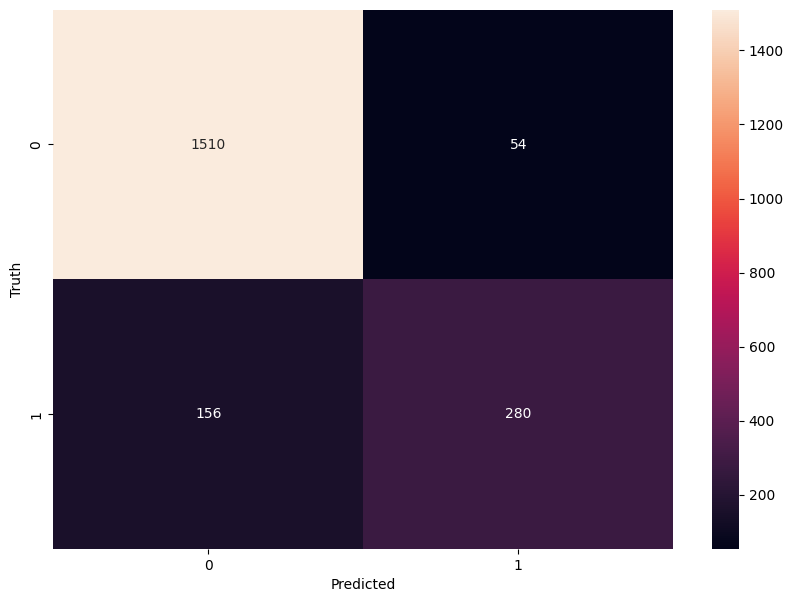

Train:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6639
           1       0.70      0.90      0.79      1361

    accuracy                           0.92      8000
   macro avg       0.84      0.91      0.87      8000
weighted avg       0.93      0.92      0.92      8000

Predicted     0     1
Actual               
0          6116   138
1           523  1223


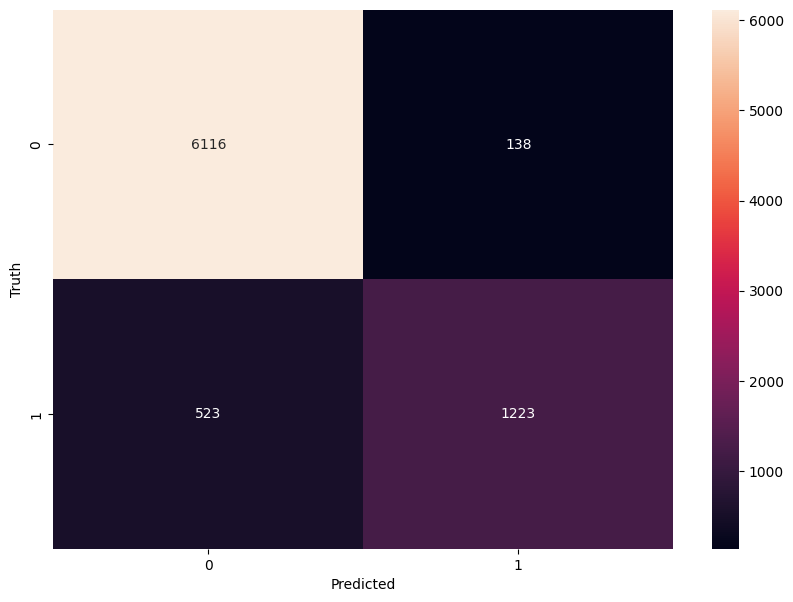

FULL
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8249
           1       0.69      0.86      0.77      1751

    accuracy                           0.91     10000
   macro avg       0.83      0.89      0.85     10000
weighted avg       0.92      0.91      0.91     10000

Predicted     0     1
Actual               
0          7573   245
1           676  1506


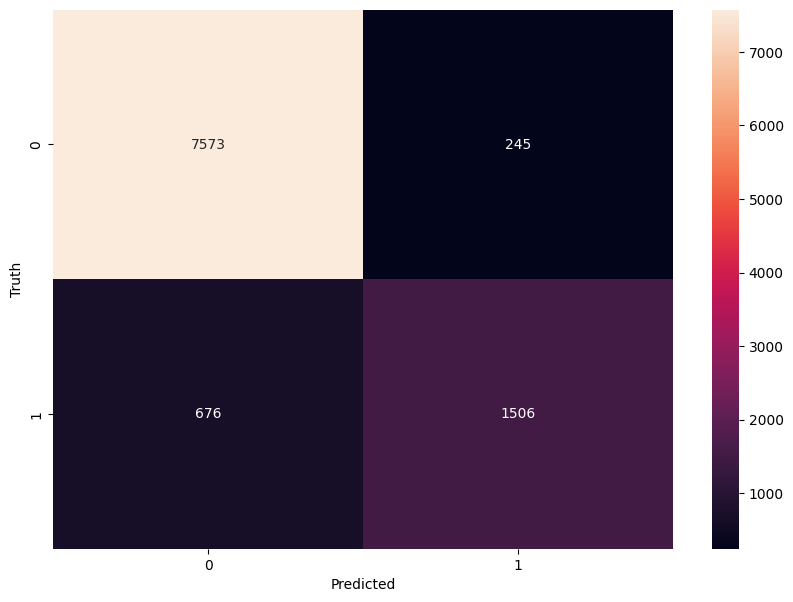

In [740]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

numeric_columns  = ['applicant_age', 'applicant_income', 'job_tenure_years', 'loan_amount', 'loan_rate','loan_income_ratio']
categorical_columns = discret_attributes.columns.tolist()
y_train = D_train['loan_approval_status']
x_train = D_train[numeric_columns + categorical_columns]
y_test = D_test['loan_approval_status']
x_test = D_test[numeric_columns + categorical_columns]
y_Full = D_full['loan_approval_status']
x_Full = D_full[numeric_columns + categorical_columns]

X_train_encoded = pd.get_dummies(x_train,dtype='float64')
X_test_encoded = pd.get_dummies(x_test,dtype='float64')
X_full_encoded = pd.get_dummies(x_Full,dtype='float64')

X_train_encoded = X_train_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_test_encoded.columns, fill_value=0)
X_full_encoded = X_full_encoded.reindex(columns=X_full_encoded.columns, fill_value=0)

LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.fit_transform(y_test)
y_Full_encoded = LabelEncoder.fit_transform(y_Full)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'activation': [ 'relu', 'tanh', 'logistic'],
    'solver': [ 'sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['adaptive', 'constant'],
    'max_iter': [200, 300, 400, 500],
    'batch_size': [ 32, 64, 128],
}
# random_search = RandomizedSearchCV(MLPClassifier(), param_grid, cv=3,n_iter=5, verbose=0,scoring='f1', n_jobs=-1, random_state=42)
# random_search.fit(X_train_encoded, y_train_encoded) 
# print(random_search.best_estimator_) 

# mlp = random_search.best_estimator_
mlp = MLPClassifier(activation='relu', alpha=0.01, batch_size=128, hidden_layer_sizes=(256,), learning_rate='adaptive', max_iter=500, solver='sgd')
mlp.fit(X_train_encoded, y_train_encoded)

y_pred_mlp = mlp.predict(X_test_encoded)
print('Accuracy:', accuracy_score(y_test_encoded, y_pred_mlp))
print(classification_report(y_test_encoded, y_pred_mlp,zero_division=1))
plot_confusion_matrix(y_pred_mlp, y_test_encoded)
print("Train:")
y_train_pred_rf = mlp.predict(X_train_encoded)
print(classification_report(y_train_pred_rf, y_train_encoded,zero_division=1))
plot_confusion_matrix(y_train_pred_rf, y_train_encoded)
print("FULL")
y_full_pred_rf = mlp.predict(X_full_encoded)
print(classification_report(y_full_pred_rf, y_Full_encoded,zero_division=1))
plot_confusion_matrix(y_full_pred_rf, y_Full_encoded)



In [ ]:
class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def update(self, *args, **kwargs):
        pass  
    

In [ ]:
from typing import List
class FeedForwardNetwork:

    def __init__(self, layers: List[Layer]):
        self.layers = layers

    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x

    def backward(self, dy: np.ndarray) -> np.ndarray:
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            x = self._inputs[i]
            dy = layer.backward(x,dy)
        return dy

    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

In [ ]:
import numpy as np
class Linear(Layer):

    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))

        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)

    def forward(self, x: np.ndarray) -> np.ndarray:
        return x @ self.weight + self.bias

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:

        self.dweight =  x.T @ dy
        self.dbias = np.sum(dy, axis=0)
        return dy @ self.weight.T

    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

In [ ]:
class ReLU(Layer):

    def __init__(self) -> None:
        pass

    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(x, 0)

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
         return dy * (x > 0)

In [ ]:
class CrossEntropy:

    def __init__(self):
        pass

    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 0)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        y = self.softmax(y) 
        return -np.mean(np.log(y[np.arange(y.shape[0]), t]))


    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        y = self.softmax(y)
        y[np.arange(y.shape[0]), t] -= 1
        return y / y.shape[0]


In [ ]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
      return np.mean(np.argmax(y, axis=1) == t)

Epoch 01 | Batch 004 | Train NLL:  6.165 | Train Acc:  49.56% | Test NLL:  7.681 | Test Acc: 48.30%
Epoch 02 | Batch 004 | Train NLL:  6.165 | Train Acc:  51.11% | Test NLL:  7.681 | Test Acc: 50.65%
Epoch 03 | Batch 004 | Train NLL:  6.165 | Train Acc:  53.33% | Test NLL:  7.681 | Test Acc: 52.50%
Epoch 04 | Batch 004 | Train NLL:  6.166 | Train Acc:  54.44% | Test NLL:  7.681 | Test Acc: 53.95%
Epoch 05 | Batch 004 | Train NLL:  6.167 | Train Acc:  54.67% | Test NLL:  7.681 | Test Acc: 55.35%
Epoch 06 | Batch 004 | Train NLL:  6.168 | Train Acc:  56.00% | Test NLL:  7.682 | Test Acc: 57.30%
Epoch 07 | Batch 004 | Train NLL:  6.169 | Train Acc:  57.56% | Test NLL:  7.683 | Test Acc: 58.75%
Epoch 08 | Batch 004 | Train NLL:  6.170 | Train Acc:  59.11% | Test NLL:  7.684 | Test Acc: 60.30%
Epoch 09 | Batch 004 | Train NLL:  6.172 | Train Acc:  60.89% | Test NLL:  7.685 | Test Acc: 62.15%
Epoch 10 | Batch 004 | Train NLL:  6.173 | Train Acc:  62.00% | Test NLL:  7.686 | Test Acc: 63.60%


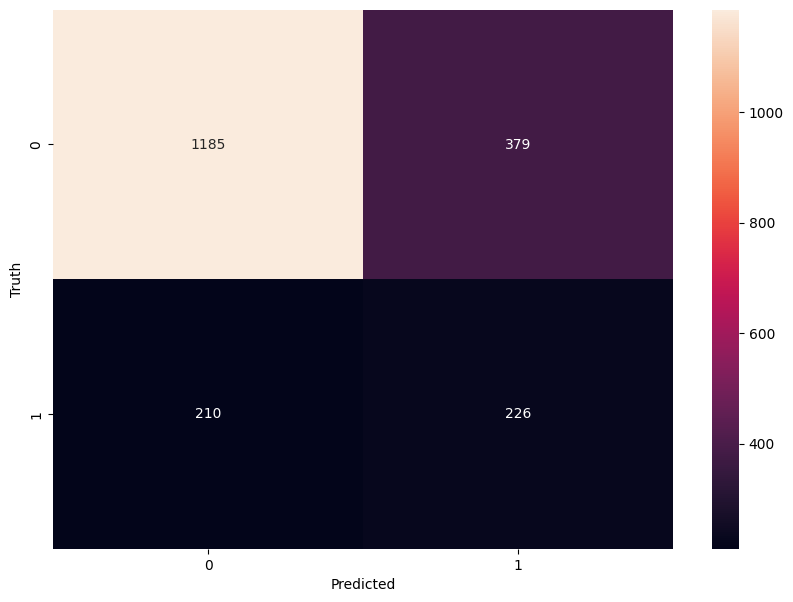

Train:
              precision    recall  f1-score   support

           0       0.86      0.76      0.80      6254
           1       0.39      0.55      0.45      1746

    accuracy                           0.71      8000
   macro avg       0.62      0.65      0.63      8000
weighted avg       0.75      0.71      0.73      8000

Predicted     0     1
Actual               
0          4734  1520
1           789   957


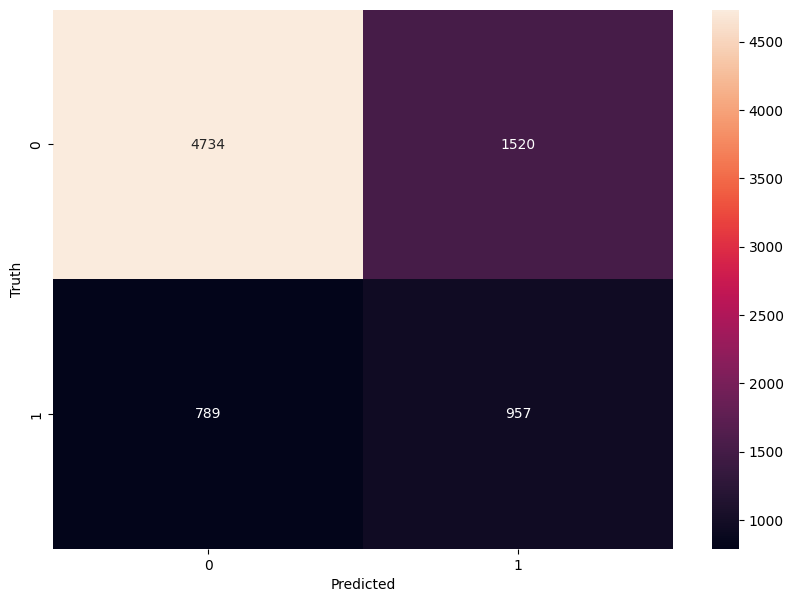

FULL
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      7818
           1       0.38      0.55      0.45      2182

    accuracy                           0.71     10000
   macro avg       0.62      0.65      0.63     10000
weighted avg       0.75      0.71      0.73     10000

Predicted     0     1
Actual               
0          5887  1931
1           984  1198


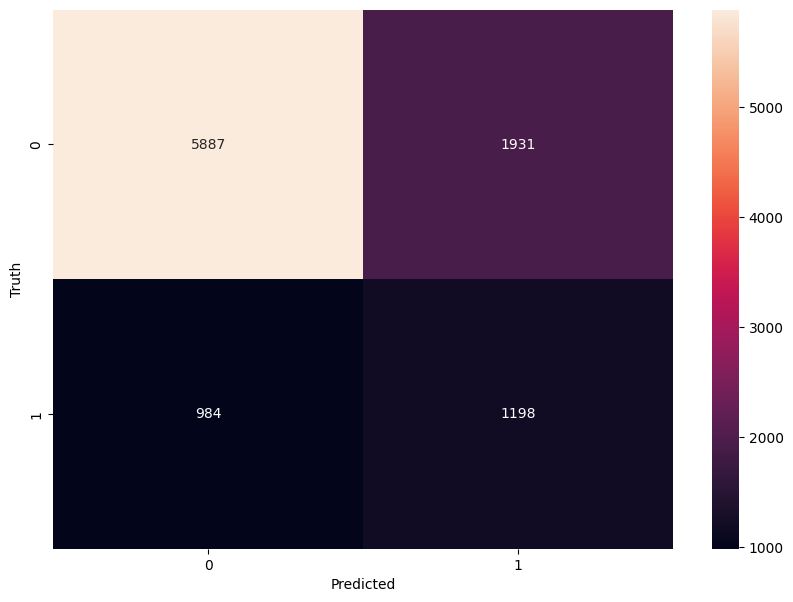

In [939]:
BATCH_SIZE = 450
HIDDEN_UNITS = 128
EPOCHS_NO = 15

optimize_args = {'mode': 'SGD', 'lr': .001}

net = FeedForwardNetwork([Linear(29, HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS,2 )])
cost_function = CrossEntropy()

for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(X_test_encoded), BATCH_SIZE)):
        # 1. Pregatim urmatorul batch
        x = np.array(X_train_encoded[idx:idx + BATCH_SIZE])
        t = np.array(y_train_encoded[idx:idx + BATCH_SIZE])
        y = net.forward(x)
        loss = cost_function.forward(y, t)
        dy = cost_function.backward(y, t)
        net.backward(dy)

       #3. Actualizam parametrii retelei
        net.update(**optimize_args)

        print(f'\rEpoch {epoch + 1:02d} '
              f'| Batch {b_no:03d} '
              f'| Train NLL: {loss:6.3f} '
              f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    y = np.array(net.forward(X_test_encoded, train=False))
    test_nll = cost_function.forward(y, y_test_encoded)
    print(f'| Test NLL: {test_nll:6.3f} '
          f'| Test Acc: {accuracy(y, y_test_encoded) * 100:3.2f}%')

print(classification_report(y_test_encoded, np.argmax(y, axis=1),zero_division=1))
plot_confusion_matrix(np.argmax(y, axis=1), y_test_encoded)
print("Train:")
y_train_pred_rf = np.array(net.forward(X_train_encoded, train=False))
print(classification_report(y_train_encoded, np.argmax(y_train_pred_rf, axis=1),zero_division=1))
plot_confusion_matrix(np.argmax(y_train_pred_rf, axis=1), y_train_encoded)
print("FULL")
y_full_pred_rf = np.array(net.forward(X_full_encoded, train=False))
print(classification_report(y_Full_encoded, np.argmax(y_full_pred_rf, axis=1),zero_division=1))
plot_confusion_matrix(np.argmax(y_full_pred_rf, axis=1), y_Full_encoded)






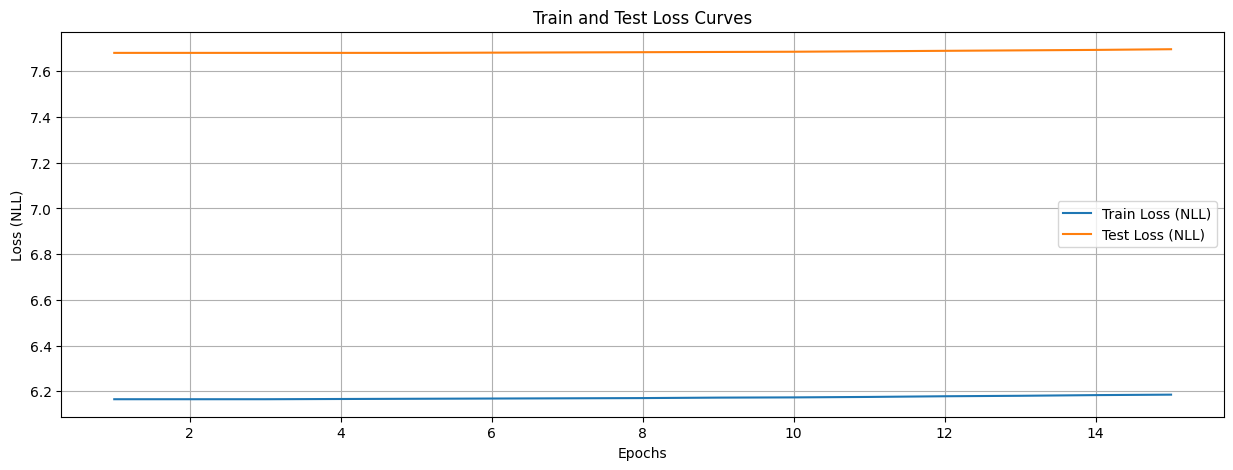

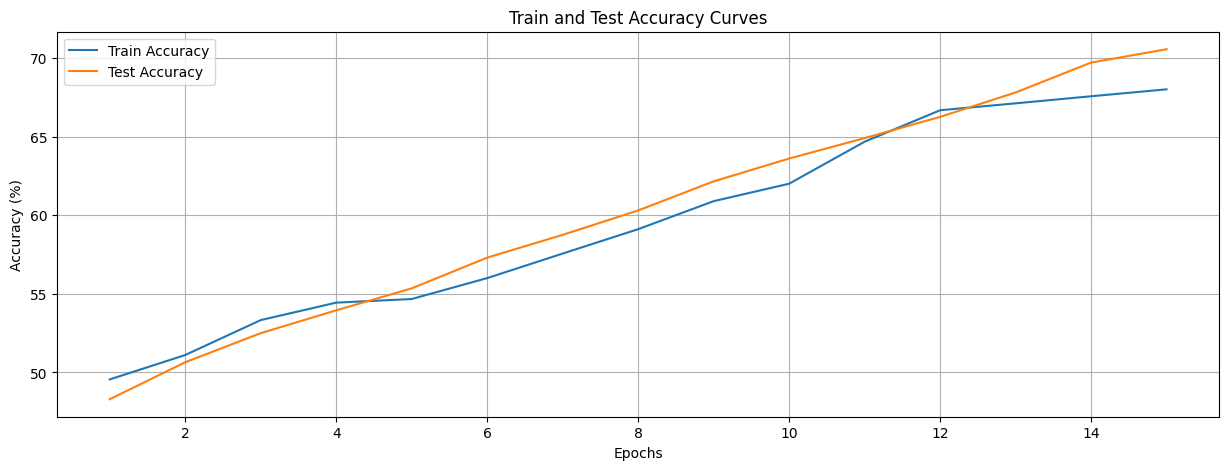

In [943]:

epochs = np.arange(1, 16)
train_nll = [6.165, 6.165, 6.165, 6.166, 6.167, 6.168, 6.169, 6.170, 6.172, 6.173, 6.175, 6.178, 6.180, 6.183, 6.185]
train_acc = [49.56, 51.11, 53.33, 54.44, 54.67, 56.00, 57.56, 59.11, 60.89, 62.00, 64.67, 66.67, 67.11, 67.56, 68.00]
test_nll = [7.681, 7.681, 7.681, 7.681, 7.681, 7.682, 7.683, 7.684, 7.685, 7.686, 7.688, 7.690, 7.692, 7.694, 7.697]
test_acc = [48.30, 50.65, 52.50, 53.95, 55.35, 57.30, 58.75, 60.30, 62.15, 63.60, 64.90, 66.25, 67.80, 69.70, 70.55]

plt.figure(figsize=(15, 5))
plt.plot(epochs, train_nll, label='Train Loss (NLL)')
plt.plot(epochs, test_nll, label='Test Loss (NLL)')
plt.xlabel('Epochs')
plt.ylabel('Loss (NLL)')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train and Test Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()